In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Financials.csv')

## Data preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [4]:
data

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


In [5]:
data.shape

(700, 16)

In [6]:
data.describe()

,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


In [7]:
data.columns = data.columns.str.strip()

In [8]:
data.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [9]:
data['Discounts'] = data['Discounts'].str.replace("$-", '0')

In [10]:
data.tail(70)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
630,Midmarket,Canada,Carretera,High,"$2,300.00",$3.00,$15.00,"$34,500.00","$4,830.00","$29,670.00","$23,000.00","$6,670.00",01/12/2014,12,December,2014
631,Enterprise,Mexico,Carretera,High,"$2,821.00",$3.00,$125.00,"$3,52,625.00","$49,367.50","$3,03,257.50","$3,38,520.00","$(35,262.50)",01/12/2013,12,December,2013
632,Government,Canada,Montana,High,"$2,227.50",$5.00,$350.00,"$7,79,625.00","$1,09,147.50","$6,70,477.50","$5,79,150.00","$91,327.50",01/01/2014,1,January,2014
633,Government,Germany,Montana,High,"$1,199.00",$5.00,$350.00,"$4,19,650.00","$58,751.00","$3,60,899.00","$3,11,740.00","$49,159.00",01/04/2014,4,April,2014
634,Government,Canada,Montana,High,$200.00,$5.00,$350.00,"$70,000.00","$9,800.00","$60,200.00","$52,000.00","$8,200.00",01/05/2014,5,May,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


In [11]:
num_col = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']
for col in num_col:
    data[col] = data[col].str.replace('$', '')
    data[col] = data[col].str.replace(',', '')
    data[col] = data[col].str.strip()
    data[col] = data[col].str.replace(')', '')
    data[col] = data[col].str.replace('(', '-')
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [12]:
data.tail(70)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
630,Midmarket,Canada,Carretera,High,2300.0,3.0,15.0,34500.0,4830.00,29670.00,23000.0,6670.00,01/12/2014,12,December,2014
631,Enterprise,Mexico,Carretera,High,2821.0,3.0,125.0,352625.0,49367.50,303257.50,338520.0,-35262.50,01/12/2013,12,December,2013
632,Government,Canada,Montana,High,2227.5,5.0,350.0,779625.0,109147.50,670477.50,579150.0,91327.50,01/01/2014,1,January,2014
633,Government,Germany,Montana,High,1199.0,5.0,350.0,419650.0,58751.00,360899.00,311740.0,49159.00,01/04/2014,4,April,2014
634,Government,Canada,Montana,High,200.0,5.0,350.0,70000.0,9800.00,60200.00,52000.0,8200.00,01/05/2014,5,May,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,01/04/2014,4,April,2014


In [13]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
# data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [14]:
data['Date'][699]

Timestamp('2014-05-01 00:00:00')

In [15]:
data['YearMonth'] = data['Date'].dt.to_period('M')

In [16]:
data

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,YearMonth
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014,2014-01
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014,2014-01
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014,2014-06
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014,2014-06
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014,2014-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014,2014-03
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014,2014-10
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014,2014-02
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014,2014-04


## Exploratory Data Analysis

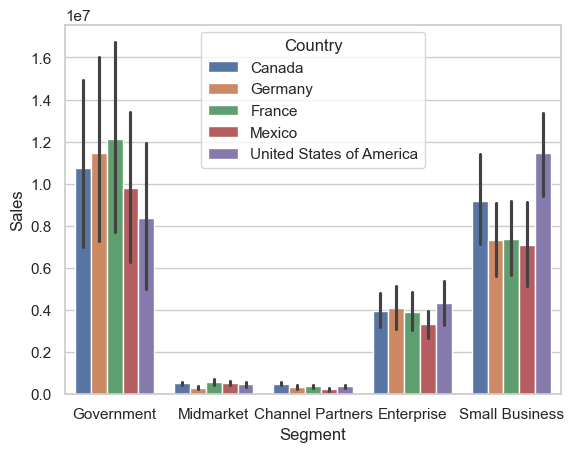

In [17]:
sns.set_theme(style="whitegrid")
sale_seg_country = sns.barplot(
    data = data, 
    x = data.Segment, 
    y = data['Sales'], 
    hue='Country', 
    estimator=sum,   
)
plt.show()

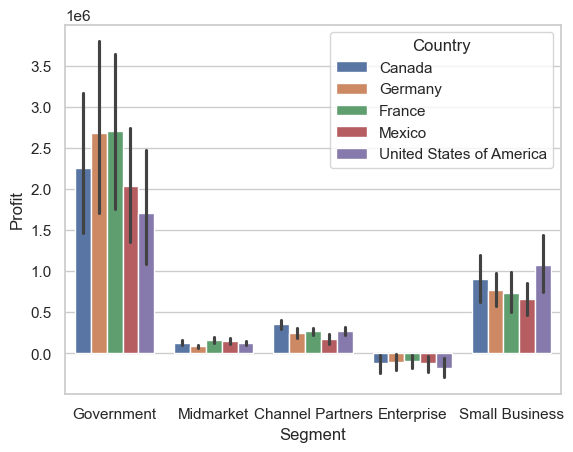

In [18]:
sns.set_theme(style="whitegrid")
profit_seg_country = sns.barplot(
    data = data, 
    x = data.Segment, 
    y = data['Profit'], 
    hue='Country', 
    estimator=sum,   
)
plt.show()

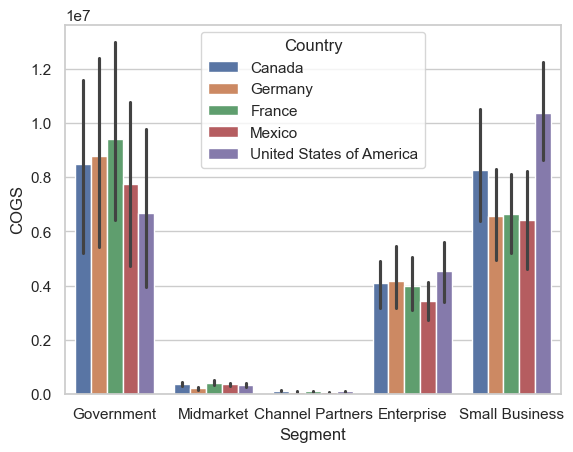

In [19]:
sns.set_theme(style="whitegrid")
COGS_seg_country = sns.barplot(
    data = data, 
    x = data.Segment, 
    y = data['COGS'], 
    hue='Country', 
    estimator=sum,   
)
plt.show()

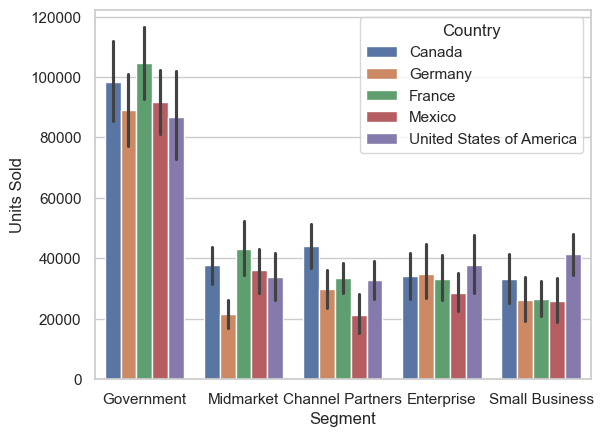

In [20]:
sns.set_theme(style="whitegrid")
COGS_seg_country = sns.barplot(
    data = data, 
    x = data.Segment, 
    y = data['Units Sold'], 
    hue='Country', 
    estimator=sum,   
)
plt.show()

Text(0.5, 1.0, 'Profit_COGS_Sale per Country')

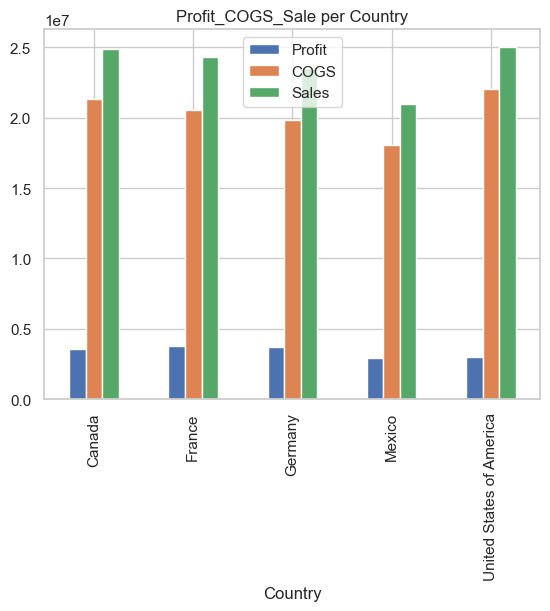

In [21]:
country_data = data.groupby('Country').agg({'Profit':'sum', 'Sales':'sum', 'COGS':'sum', 'Units Sold':'sum'})
country_data[['Profit','COGS', 'Sales']].plot(kind='bar')
plt.title('Profit_COGS_Sale per Country')

Text(0.5, 1.0, 'Profit_COGS_Sale per Segment')

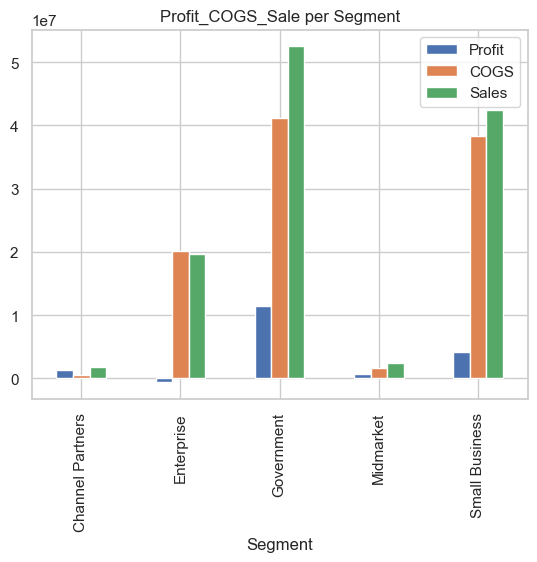

In [22]:
segment_data = data.groupby('Segment').agg({'Profit':'sum', 'Sales':'sum', 'COGS':'sum', 'Units Sold':'sum'})
segment_data[['Profit','COGS', 'Sales']].plot(kind='bar')
plt.title('Profit_COGS_Sale per Segment')

Text(0.5, 1.0, 'Profit_COGS_Sale per Product')

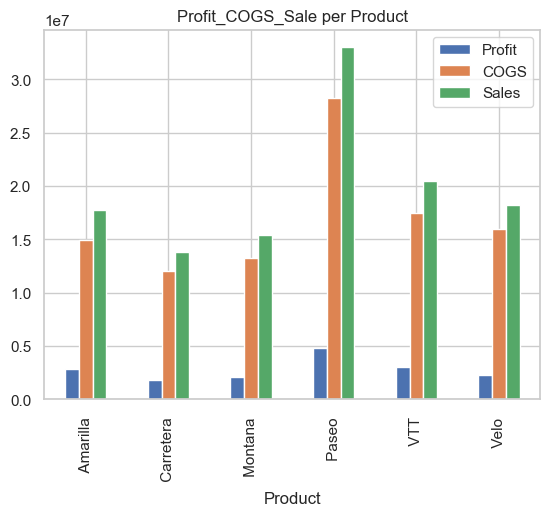

In [23]:
product_data = data.groupby('Product').agg({'Profit':'sum', 'Sales':'sum', 'COGS':'sum', 'Units Sold':'sum'})
product_data[['Profit','COGS', 'Sales']].plot(kind='bar')
plt.title('Profit_COGS_Sale per Product')

In [24]:
aggregated_data = data.groupby('YearMonth').agg({'Sales':'sum', 'COGS':'sum', 'Profit':'sum', 'Units Sold':'sum'}).reset_index()

In [25]:
aggregated_data['YearMonth'] = aggregated_data['YearMonth'].dt.to_timestamp()

In [26]:
aggregated_data

,YearMonth,Sales,COGS,Profit,Units Sold
0,2013-09-01,4484000.03,3720397.0,763603.03,50601.0
1,2013-10-01,9295611.10,7637816.0,1657795.10,95622.0
2,2013-11-01,7267203.30,6501701.0,765502.30,65481.0
3,2013-12-01,5368441.08,4676877.0,691564.08,52970.0
4,2014-01-01,6607761.69,5793733.0,814028.69,67835.5
5,2014-02-01,7297531.39,6148984.0,1148547.39,55115.0
6,2014-03-01,5586859.87,4916993.0,669866.87,53420.0
7,2014-04-01,6964775.08,6034790.5,929984.58,78886.5
8,2014-05-01,6210211.06,5381571.0,828640.06,51771.0
9,2014-06-01,9518893.82,8045140.0,1473753.82,103302.0


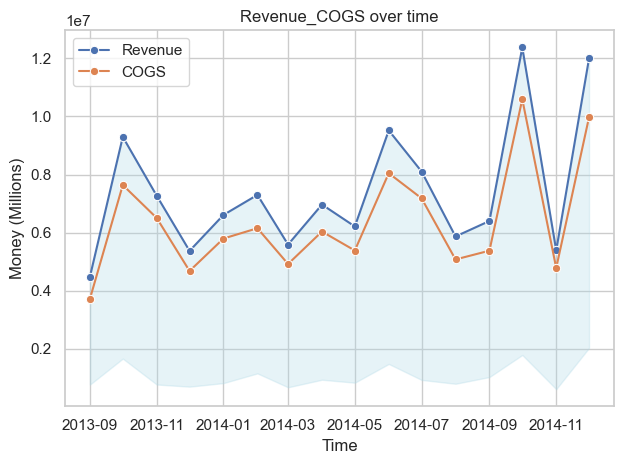

In [27]:
sns.lineplot(data=aggregated_data, x='YearMonth', y='Sales', marker='o', label='Revenue')
sns.lineplot(data=aggregated_data, x='YearMonth', y='COGS', marker='o', label='COGS')
plt.fill_between(
    aggregated_data['YearMonth'], 
    aggregated_data['Sales'], 
    aggregated_data['Profit'], 
    where=(aggregated_data['Sales']>aggregated_data['Profit']),
    interpolate=True,
    color='lightblue', alpha=0.3
)
plt.fill_between(
    aggregated_data['YearMonth'], 
    aggregated_data['Sales'], 
    aggregated_data['Profit'], 
    where=(aggregated_data['Sales']<aggregated_data['Profit']),
    interpolate=True,
    color='lightblue', alpha=0.3
)
plt.title('Revenue_COGS over time')
plt.xlabel('Time')
plt.ylabel('Money (Millions)')
plt.legend()
plt.tight_layout()
plt.show()

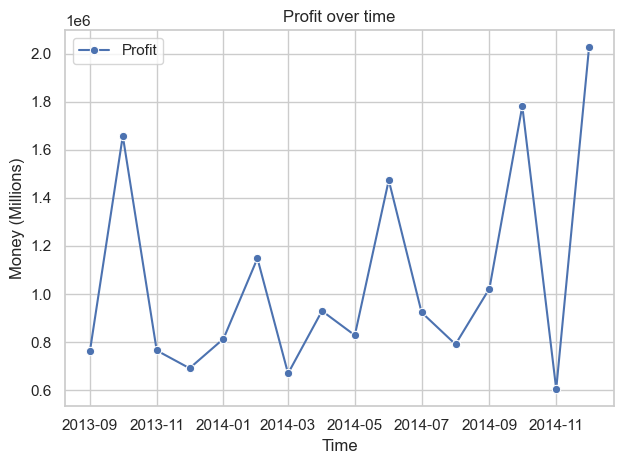

In [28]:
sns.lineplot(data=aggregated_data, x='YearMonth', y='Profit', marker='o', label='Profit')
plt.title('Profit over time')
plt.xlabel('Time')
plt.ylabel('Money (Millions)')
plt.legend()
plt.tight_layout()
plt.show()

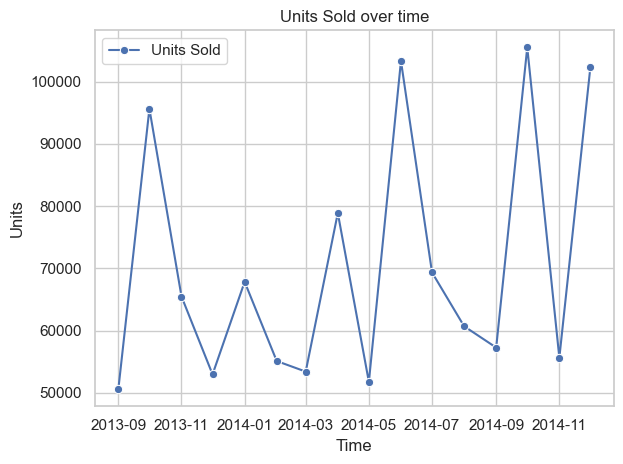

In [29]:
sns.lineplot(data=aggregated_data, x='YearMonth', y='Units Sold', marker='o', label='Units Sold')
plt.title('Units Sold over time')
plt.xlabel('Time')
plt.ylabel('Units')
plt.legend()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Percentage of segment')

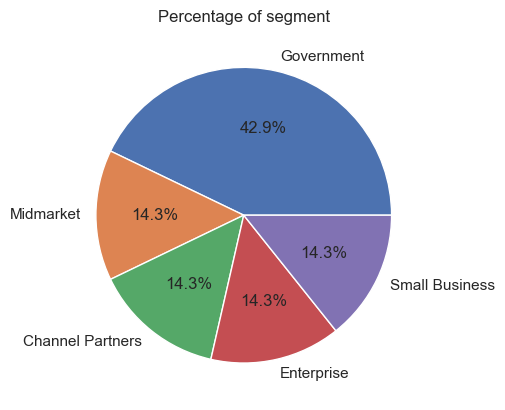

In [30]:
plt.pie(
    x=data['Segment'].value_counts(),
    labels=data['Segment'].value_counts().index,
    autopct='%1.1f%%'
)
plt.title('Percentage of segment')

Text(0.5, 1.0, 'Percentage of country')

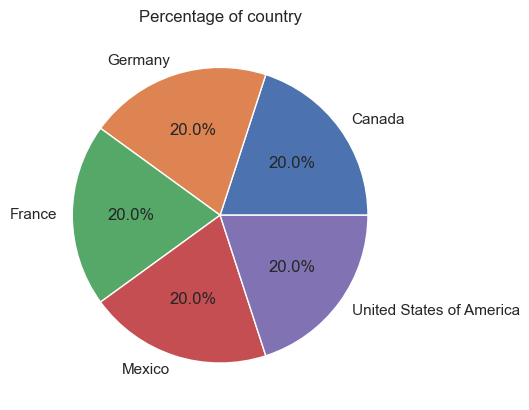

In [31]:
plt.pie(
    x=data['Country'].value_counts(),
    labels=data['Country'].value_counts().index,
    autopct='%1.1f%%'
)
plt.title('Percentage of country')

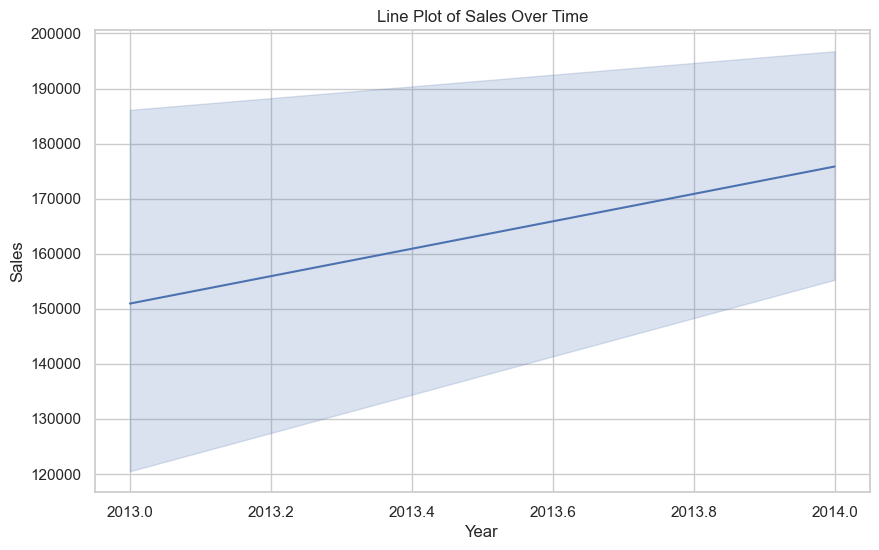

In [32]:
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Sales', data=data)
plt.title('Line Plot of Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)  # Add grid lines
plt.show()

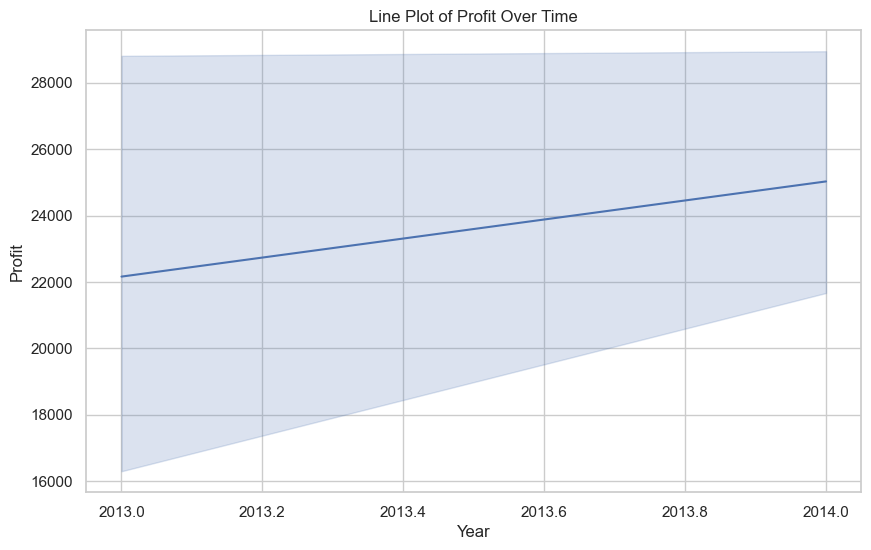

In [33]:
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Profit', data=data)
plt.title('Line Plot of Profit Over Time')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.grid(True)  # Add grid lines
plt.show()

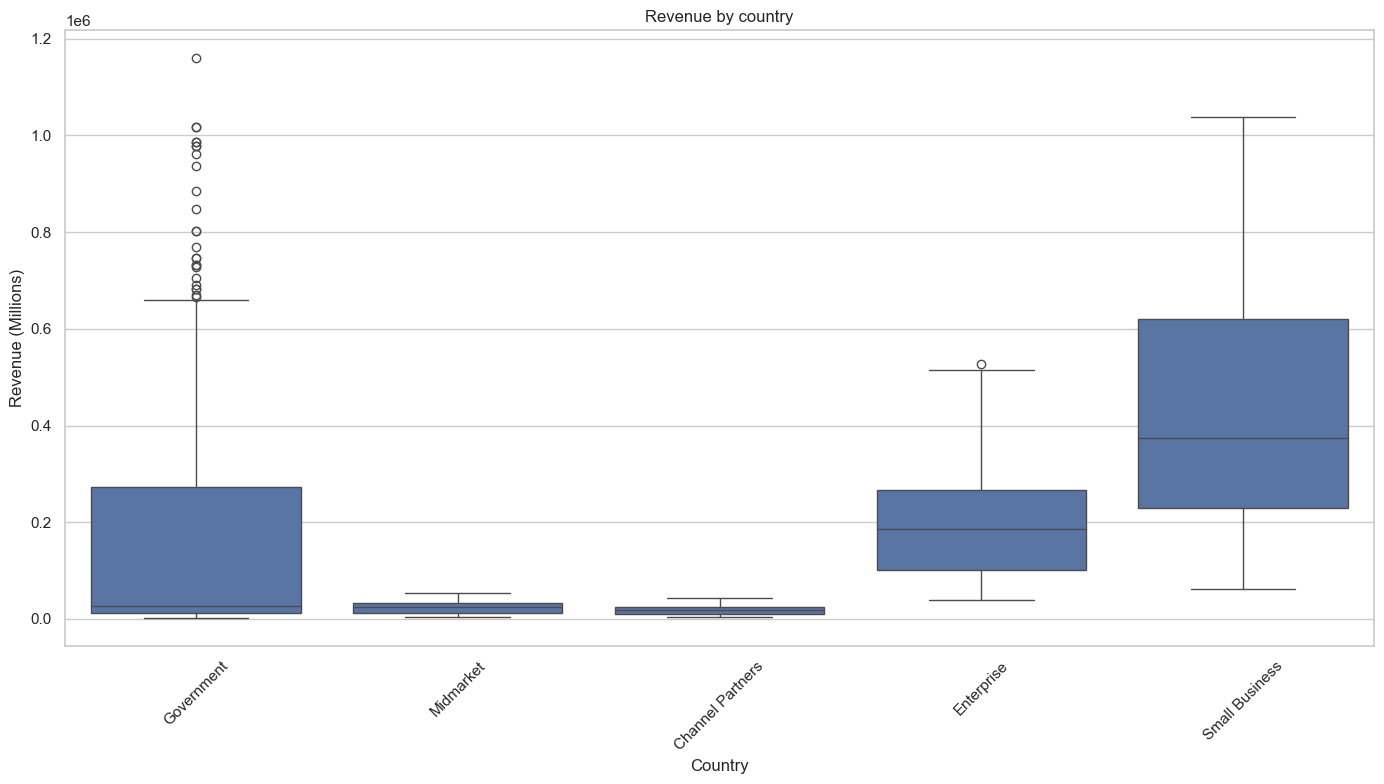

In [34]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='Segment', y='Sales')
plt.title('Revenue by country')
plt.xlabel('Country')
plt.ylabel('Revenue (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
print(f'Unique_unit_sold: {data["Units Sold"].nunique()}')
print(f'Unique_manufacturing_price: {data["Manufacturing Price"].nunique()}')
print(f'Unique_sale_price: {data["Sale Price"].nunique()}')
print(f'Unique_discounts: {data["Discounts"].nunique()}')

Unique_unit_sold: 510
Unique_manufacturing_price: 6
Unique_sale_price: 7
Unique_discounts: 515


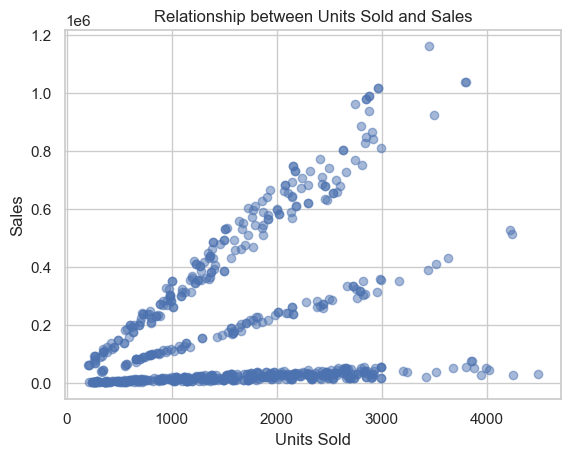

In [36]:
plt.scatter(data['Units Sold'], data['Sales'], alpha=0.5)
plt.title('Relationship between Units Sold and Sales')
plt.xlabel('Units Sold')
plt.ylabel('Sales')
plt.show()

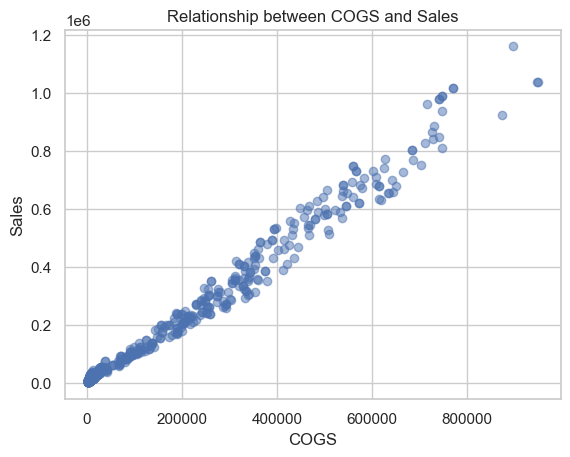

In [37]:
plt.scatter(data['COGS'], data['Sales'], alpha=0.5)
plt.title('Relationship between COGS and Sales')
plt.xlabel('COGS')
plt.ylabel('Sales')
plt.show()

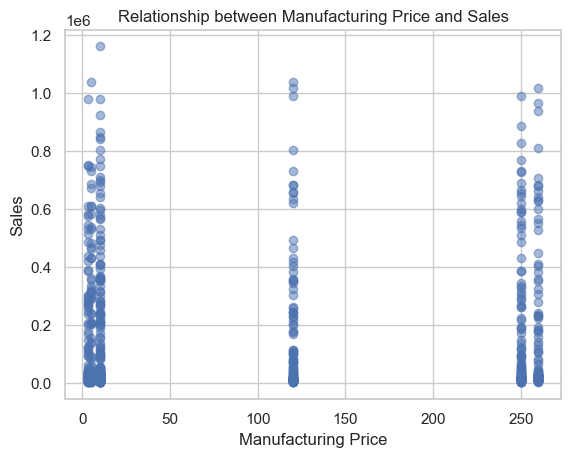

In [38]:
plt.scatter(data['Manufacturing Price'], data['Sales'], alpha=0.5)
plt.title('Relationship between Manufacturing Price and Sales')
plt.xlabel('Manufacturing Price')
plt.ylabel('Sales')
plt.show()

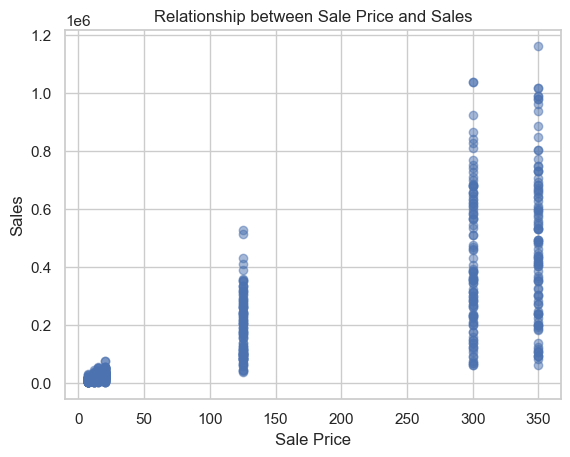

In [39]:
plt.scatter(data['Sale Price'], data['Sales'], alpha=0.5)
plt.title('Relationship between Sale Price and Sales')
plt.xlabel('Sale Price')
plt.ylabel('Sales')
plt.show()

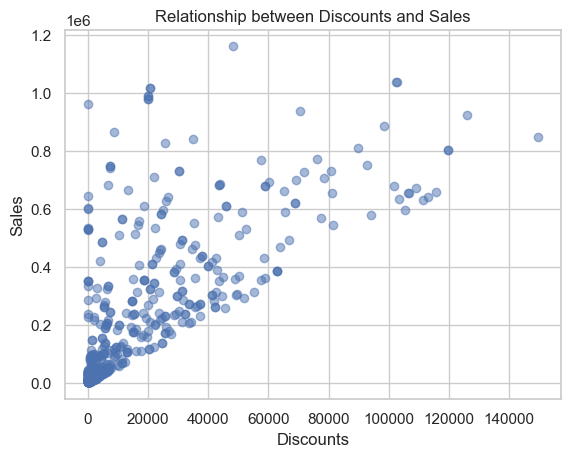

In [40]:
plt.scatter(data['Discounts'], data['Sales'], alpha=0.5)
plt.title('Relationship between Discounts and Sales')
plt.xlabel('Discounts')
plt.ylabel('Sales')
plt.show()

## Model Building
-Revenue forecast based on COGS using Linear Regression

Cross Validation

In [41]:
from sklearn.model_selection import cross_validate, train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [42]:
features = ['COGS']
target = 'Sales'
X = data[features]
y = data[target]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [44]:
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_score = cross_validate(model, X_train, y_train, cv=kf, return_estimator=True)

In [45]:
print(cv_score['test_score'])
print(cv_score['estimator'])
print(cv_score['score_time'])

[0.9843254  0.98452215 0.98309708 0.98744903 0.98046108]
[LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()]
[0. 0. 0. 0. 0.]


In [46]:
lst = []
for i in cv_score['estimator']:
    lst.append(i.score(X_test, y_test))
arr_es = np.array(lst)

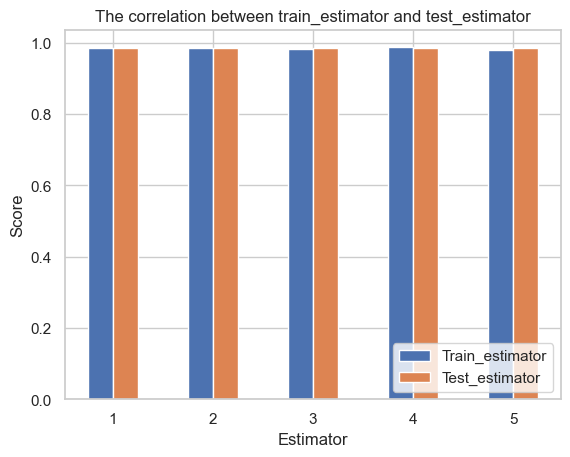

In [47]:
bar_width = 0.25
plt.bar(np.arange(1, len(cv_score['test_score'])+1), cv_score['test_score'], width=bar_width, label='Train_estimator')
plt.bar(np.arange(1, len(arr_es)+1)+bar_width, arr_es, width=bar_width, label='Test_estimator')
plt.xlabel('Estimator')
plt.ylabel('Score')
plt.xticks(np.arange(len(arr_es))+1+bar_width/2, np.arange(len(arr_es))+1)
plt.legend(loc='lower right')
plt.title('The correlation between train_estimator and test_estimator')
plt.show()

In [48]:
df_estimator = pd.DataFrame({'Train_estimator':cv_score['test_score'], 'Test_estimator':arr_es})
df_estimator

,Train_estimator,Test_estimator
0,0.984325,0.986161
1,0.984522,0.986145
2,0.983097,0.986218
3,0.987449,0.986201
4,0.980461,0.986209


Training model

In [49]:
model.fit(X_train, y_train)

LinearRegression()

Score_evaluate

In [50]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Root Mean Square Error: ", rmse)
print("R_squared: ", r2)
print("Mean Absolute Error: ", mae)

Root Mean Square Error:  31257.169962817723
R_squared:  0.9861973516323737
Mean Absolute Error:  18942.128940626168


In [51]:
arr_rmse =[]
arr_r2 =[]
arr_mae =[]

In [52]:
arr_rmse.append(rmse)
arr_r2.append(r2)
arr_mae.append(mae)

In [53]:
score_df = pd.DataFrame({'Root Mean Square Error':arr_rmse, 'R_squared':arr_r2, 'Mean Absolute Error':arr_mae})
score_df

,Root Mean Square Error,R_squared,Mean Absolute Error
0,31257.169963,0.986197,18942.128941


In [54]:
print("Coef_: ", model.coef_)
print("Intercept_: ",model.intercept_)

Coef_:  [1.15155299]
Intercept_:  1809.8209302150644


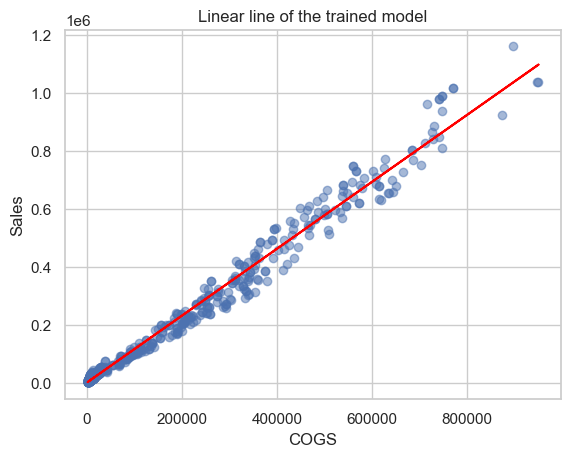

In [55]:
plt.scatter(data['COGS'], data['Sales'], alpha=0.5)
plt.plot(X, model.predict(X), color='red')
plt.title('Linear line of the trained model')
plt.xlabel('COGS')
plt.ylabel('Sales')
plt.show()

Test the model using a hypothetical data

In [56]:
hypo_data = pd.DataFrame({
    'COGS': [20000, 300000, 10203, 2332, 112010, 910000, 1000000]
})

In [57]:
print(model.predict(hypo_data))

[  24840.88078256  347275.71871535   13559.11611389    4495.242509
  130795.27163326 1049723.04421179 1153362.81354733]


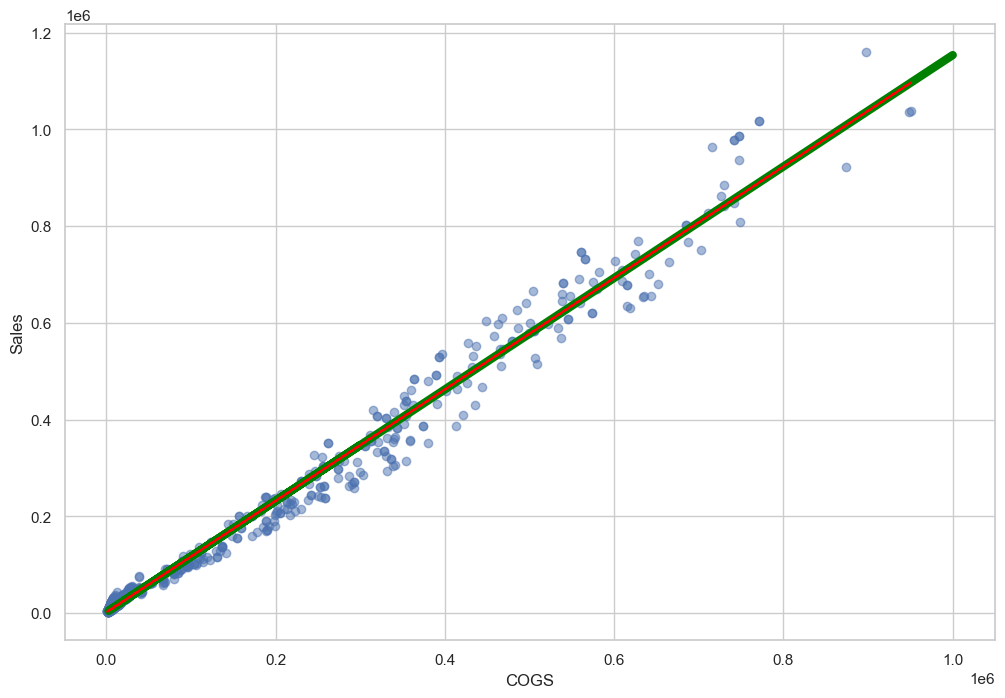

In [58]:
plt.figure(figsize=(12, 8))
plt.scatter(data['COGS'], data['Sales'], alpha=0.5)
plt.plot(hypo_data, model.predict(hypo_data), color='green', linewidth = 6)
plt.plot(X, model.predict(X), color='red')
plt.xlabel('COGS')
plt.ylabel('Sales')
plt.show()